In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Vertex Count comparison

    In this script, I will merge the Vertex Count data from the Open Boundaries simulations and Periodic Boundaries. 

In [2]:
free = pd.read_csv('FreeBound.dat', sep = "\t", index_col = [0,1])
per = pd.read_csv('PeriodicBound.dat', sep = "\t", index_col = [0,1])

In [3]:
per = per.sort_index(level = 0,ascending=True)

In [4]:
free = free.sort_index(level = 0,ascending=True)

In [5]:
free.sort_index(axis = 1)
per.sort_index(axis = 1)

coordination       err  fraction  number    time
frame  type                                                    
0      Q = +1             3  0.001858  0.373675  298.94     0.0
       Q = +2             4  0.002895  0.254127   91.74     0.0
       Q = +3             3  0.001397  0.125200  100.16     0.0
       Q = +4             4  0.001893  0.060665   21.90     0.0
       Q = -1             3  0.001855  0.376875  301.50     0.0
...                     ...       ...       ...     ...     ...
250000 Q = +4             4  0.000552  0.005873    2.12  2500.0
       Q = -1             3  0.001295  0.554650  443.72  2500.0
       Q = -2             4  0.000944  0.023657    8.54  2500.0
       Q = -3             3  0.000035  0.000050    0.04  2500.0
       Q = 0              4  0.002136  0.864432  312.06  2500.0

[2206 rows x 5 columns]

In [6]:
free

coordination  number  fraction       err    time
frame  type                                                    
0      Q = +1             3   174.5  0.375269  0.008306     0.0
       Q = +2             4    55.0  0.244444  0.013610     0.0
       Q = +3             3    58.3  0.125376  0.004420     0.0
       Q = +4             4    14.7  0.065333  0.005928     0.0
       Q = -1             3   174.0  0.374194  0.006816     0.0
...                     ...     ...       ...       ...     ...
250000 Q = +3             3     3.5  0.007527  0.001704  2500.0
       Q = +4             4     0.7  0.003111  0.001157  2500.0
       Q = -1             3   256.9  0.552473  0.004342  2500.0
       Q = -2             4     7.4  0.032889  0.003818  2500.0
       Q = 0              4   191.4  0.850667  0.007873  2500.0

[2127 rows x 5 columns]

In [7]:
per.tail(9)

coordination  number  fraction       err    time
frame  type                                                    
249000 Q = 0              4  311.80  0.863712  0.002490  2490.0
250000 Q = +1             3  351.16  0.438950  0.001407  2500.0
       Q = +2             4   38.28  0.106039  0.002227  2500.0
       Q = +3             3    5.08  0.006350  0.000397  2500.0
       Q = +4             4    2.12  0.005873  0.000552  2500.0
       Q = -1             3  443.72  0.554650  0.001295  2500.0
       Q = -2             4    8.54  0.023657  0.000944  2500.0
       Q = -3             3    0.04  0.000050  0.000035  2500.0
       Q = 0              4  312.06  0.864432  0.002136  2500.0

In [28]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Sans-serif'

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
sorted([f.name for f in mpl.font_manager.fontManager.ttflist])

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato"])

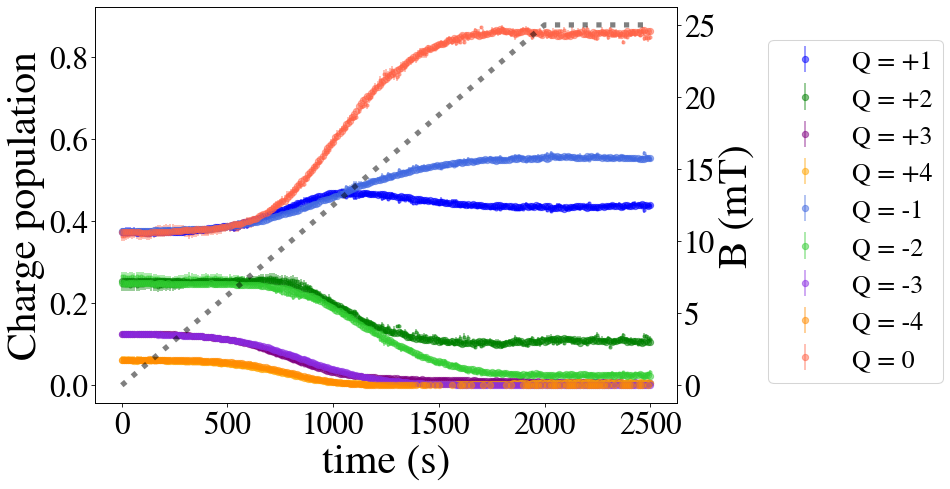

In [34]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in free.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='.', alpha = 0.5)
    
for typ_m, mtype in per.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='o', label = typ_m, alpha = 0.5)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.48, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)
plt.savefig('ChargePopulation.pdf', bbox_inches='tight')
plt.show()